# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import json
import pandas as pd
from collections import Counter
import numpy as np
import math
import requests
import yfinance as yf
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
##Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from scipy import stats 
from statsmodels.graphics.gofplots import qqplot as qq
from scipy.stats import kurtosis
import scipy
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.core.window.rolling import Rolling
from sklearn.model_selection import train_test_split as split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import itertools
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit
from matplotlib import pyplot
import os
import re
import seaborn as sns
import plotly.express as px
import warnings
from matplotlib.patches import Patch

# Load The Data

In [3]:
import datetime

sdate = datetime.datetime(2009, 1, 2)
edate = datetime.datetime(2020, 8, 19)

dates = [sdate+datetime.timedelta(days=x) for x in range((edate-sdate).days)]

In [4]:
currency_tickers = ['INR=X']
us_treasury_bonds = ['^IRX','^FVX','^TNX','^TYX']
futures = ['DX-Y.NYB','GC=F','SI=F','BZ=F','^BSESN','^IXIC']

start = "2009-1-2"
end = "2020-8-19"

df_value = pd.DataFrame()
df_value['Date'] = dates
df_value.set_index('Date',inplace=True)

for ticker in (currency_tickers+us_treasury_bonds+futures):
    print(ticker,'Running')
    data=yf.Ticker(ticker).history(start=start, end=end)
    for i,index in enumerate(df_value.index.tolist()):
        if index not in data.index.tolist():
            
            data.loc[index] = data.loc[df_value.index.tolist()[i-1]]
    data.sort_index(axis=0,inplace=True)
    if ticker != 'INR=X':
        df_value[ticker] = data['Close']
    else:
        df_value[ticker+'_Open'] = data['Open']
        df_value[ticker+'_Close'] = data['Close']
        df_value[ticker+'_High'] = data['High']
        df_value[ticker+'_Low'] = data['Low']
    
import investpy
tickers = ['India 3M','India 6M','India 1Y','India 2Y','India 3Y']
for ticker in tickers:
    data = investpy.get_bond_historical_data(bond=ticker, from_date='02/01/2009', to_date='19/08/2020')
    for i,index in enumerate(df_value.index.tolist()):
        if index not in data.index.tolist():
            data.loc[index] = data.loc[df_value.index.tolist()[i-1]]
    data.sort_index(axis=0,inplace=True)
    df_value[ticker] = data['Close']

INR=X Running
^IRX Running
^FVX Running
^TNX Running
^TYX Running
DX-Y.NYB Running
GC=F Running
SI=F Running
BZ=F Running
^BSESN Running
^IXIC Running


ConnectionError: ERR#0015: error 403, try again later.

# Decomposition

Decomposition of Time Series

In [53]:
 df_value[:3000]

,INR=X_Open,INR=X_Close,INR=X_High,INR=X_Low,^IRX,^FVX,^TNX,^TYX,DX-Y.NYB,GC=F,SI=F,BZ=F,^BSESN,^IXIC,Year
Date,,,,,,,,,,,,,,,
2009-01-02,48.064999,48.244999,49.075001,48.064999,0.085,1.727,2.416,2.815,81.839996,878.799988,11.465,46.910000,9958.219727,1632.209961,2009
2009-01-03,48.064999,48.244999,49.075001,48.064999,0.085,1.727,2.416,2.815,81.839996,878.799988,11.465,46.910000,9958.219727,1632.209961,2009
2009-01-04,48.064999,48.244999,49.075001,48.064999,0.085,1.727,2.416,2.815,81.839996,878.799988,11.465,46.910000,9958.219727,1632.209961,2009
2009-01-05,48.799999,48.229000,48.799999,48.195999,0.085,1.694,2.488,3.040,82.639999,857.200012,11.245,49.619999,10275.599609,1628.030029,2009
2009-01-06,48.500000,48.505001,48.759998,48.450001,0.130,1.704,2.505,3.069,82.849998,865.400024,11.420,50.529999,10335.929688,1652.380005,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-16,65.620499,65.620499,65.628502,65.209999,0.708,2.030,2.522,3.135,100.269997,1226.500000,17.296,51.740002,29585.849609,5900.759766,2017
2017-03-17,65.364998,65.404503,65.642998,65.349998,0.708,2.020,2.501,3.113,100.300003,1229.800049,17.379,51.759998,29648.990234,5901.000000,2017
2017-03-18,65.364998,65.404503,65.642998,65.349998,0.708,2.020,2.501,3.113,100.300003,1229.800049,17.379,51.759998,29648.990234,5901.000000,2017


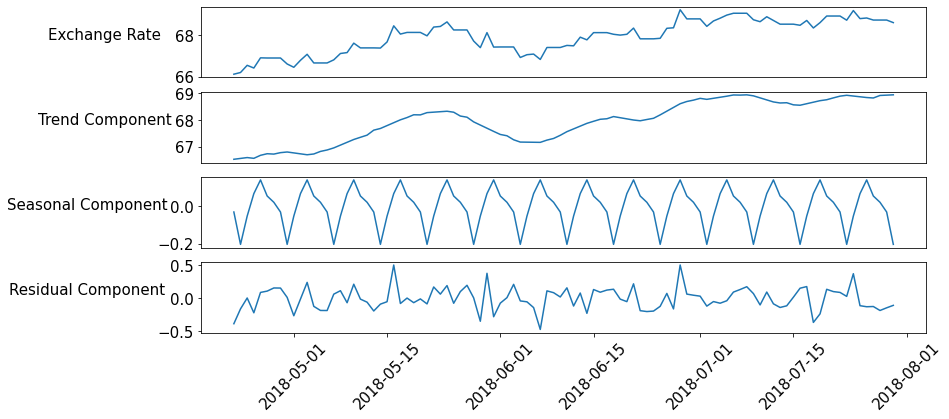

In [48]:
import statsmodels.api as sm

import matplotlib
matplotlib.rcParams.update({'font.size': 15})

decomposition = sm.tsa.seasonal_decompose(df_value[['INR=X_Close']][-850:-750], model='additive', extrapolate_trend='freq') 

plt.figure(figsize=(13,6))

plt.subplot(4,1,1)
plt.plot(decomposition.observed)
plt.ylabel('Exchange Rate',rotation=0,labelpad=70)
plt.xticks([])

plt.subplot(4,1,3)
plt.plot(decomposition.seasonal)
plt.ylabel('Seasonal Component',rotation=0,labelpad=70)
plt.xticks([])

plt.subplot(4,1,2)
plt.plot(decomposition.trend)
plt.ylabel('Trend Component',rotation=0,labelpad=70)
plt.xticks([])

plt.subplot(4,1,4)
plt.plot(decomposition.resid)
plt.ylabel('Residual Component',rotation=0,labelpad=70)
plt.xticks(rotation = 45)
plt.savefig(r"C:\Users\User\Desktop\MTP\Final Reports\Pics\decomposed_series.png",bbox_inches='tight',dpi=300)
plt.show()

Box Plots

In [49]:
dates = []
for x in df_value.index:
    dates.append(x.year)
df_value['Year'] = dates

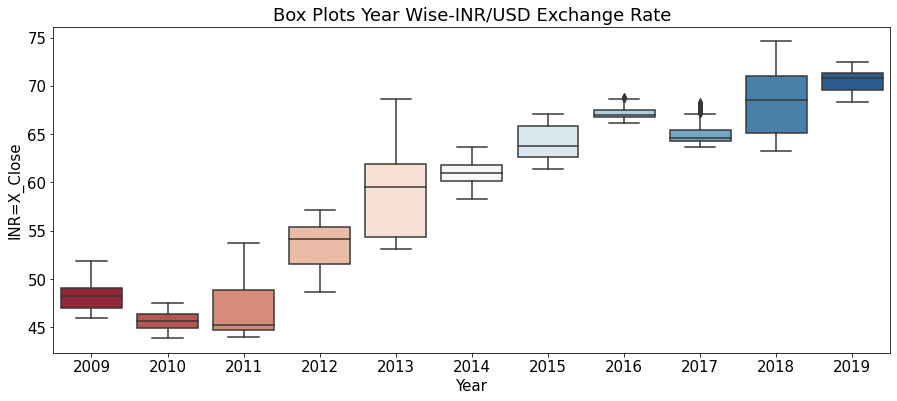

In [51]:
import seaborn as sns
plt.figure(figsize=(15,6))
ax = sns.boxplot(x=df_value['Year'][:-235],y=df_value['INR=X_Close'][:-235],palette='RdBu')
ax.set_title('Box Plots Year Wise-INR/USD Exchange Rate')
plt.style.context('fivethirtyeight')
plt.savefig(r"C:\Users\User\Desktop\MTP\Final Reports\Pics\boxplots_series.png",bbox_inches='tight',dpi=300)
plt.show()

# Stationarity Test

ADF

In [89]:
##ADF Test-Statsmodels Library

def ad_fuller_func(X):
    result_ad_fuller = adfuller(X)
    print('ADF Statistic: %f' % result_ad_fuller[0])
    print('p-value: %f' %result_ad_fuller[1])
    print('Critical Values:')
    for key, value in result_ad_fuller[4].items():
        print('\t%s: %.3f' % (key, value))
 
    if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
        print('Reject Null Hypothesis (Ho)-Time Series is Stationary')
    else:
        print('Failed to Reject Null Hypothesis (Ho)-Time Series is Non-Stationary')

In [11]:
ad_fuller_func(df_value['INR=X_Close'])

ADF Statistic: -0.609572
p-value: 0.868804
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Failed to Reject Null Hypothesis (Ho)-Time Series is Non-Stationary


In [12]:
ad_fuller_func(df_value['INR=X_Close'].diff().dropna())

ADF Statistic: -22.475831
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Reject Null Hypothesis (Ho)-Time Series is Stationary


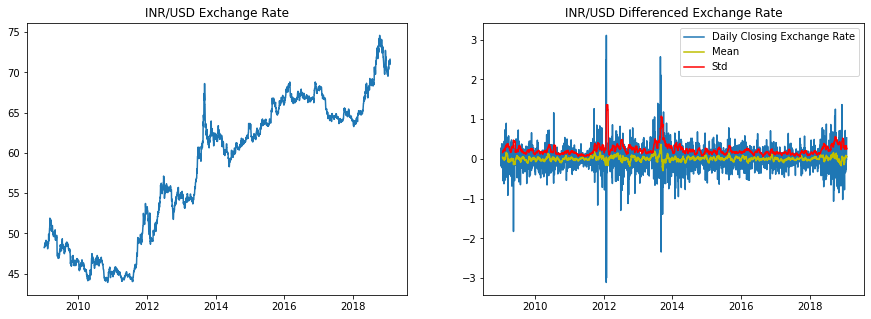

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('INR/USD Exchange Rate')
plt.plot(df_value['INR=X_Close'][:-235])

plt.subplot(1,2,2)
plt.title('INR/USD Differenced Exchange Rate')
plt.plot(df_value['INR=X_Close'][:-235].diff(),label='Daily Closing Exchange Rate')
plt.plot(df_value['INR=X_Close'][:-235].diff().rolling(20).mean(),'y',label='Mean')
plt.plot(df_value['INR=X_Close'][:-235].diff().rolling(20).std(),'r',label='Std')
plt.legend()
plt.show()

KPSS

In [16]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [17]:
kpss_test(df_value['INR=X_Close'])

KPSS Statistic: 9.111423825918509
p-value: 0.01
num lags: 39
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


In [19]:
kpss_test(df_value['INR=X_Close'].diff().dropna())

KPSS Statistic: 0.06336909171255035
p-value: 0.1
num lags: 8
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


# Auto Co-Relation

Raw Data

Text(0.5, 0, 'Lags')

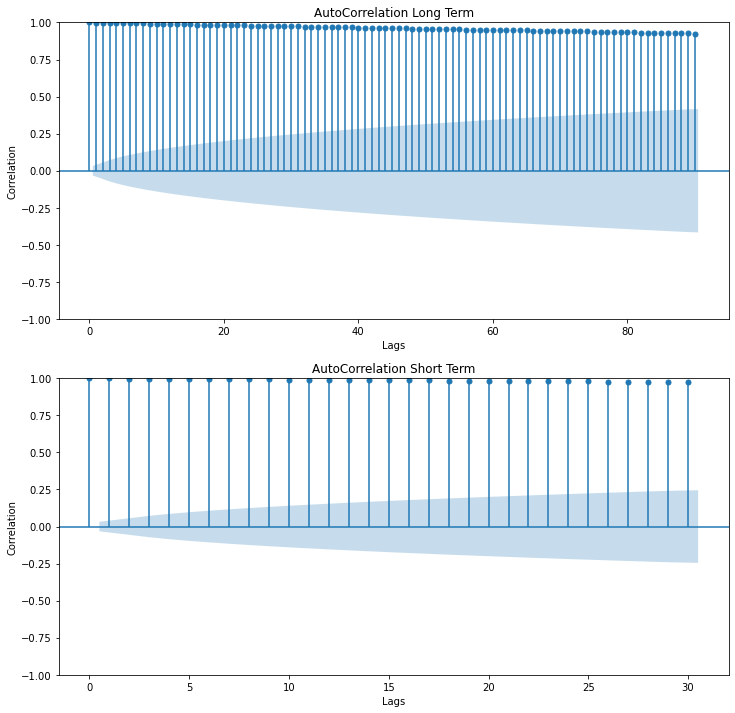

In [14]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
acf = plot_acf(df_value['INR=X_Close'][:-235],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(df_value['INR=X_Close'][:-235],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

Differenced Data

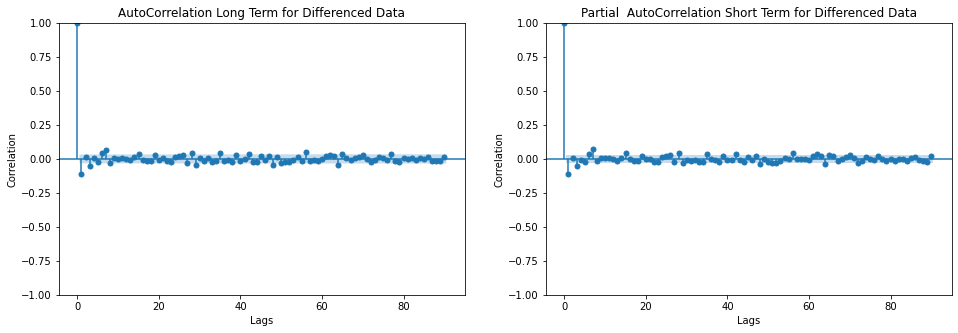

In [33]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(16,5))
acf = plot_acf(df_value['INR=X_Close'][:-235].diff().dropna(),lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term for Differenced Data')
acf = plot_pacf(df_value['INR=X_Close'][:-235].diff().dropna(),lags=90,ax=ax2)
ax2.set_title('Partial  AutoCorrelation Short Term for Differenced Data')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.show()

In [99]:
train,test = split(df_value[['INR=X_Close']][:-235],train_size=0.7,shuffle=False)

# Residual Modelling

In [69]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df_value[['INR=X_Close']][:], model='additive', extrapolate_trend='freq') 

In [70]:
residuals = decomposition.resid

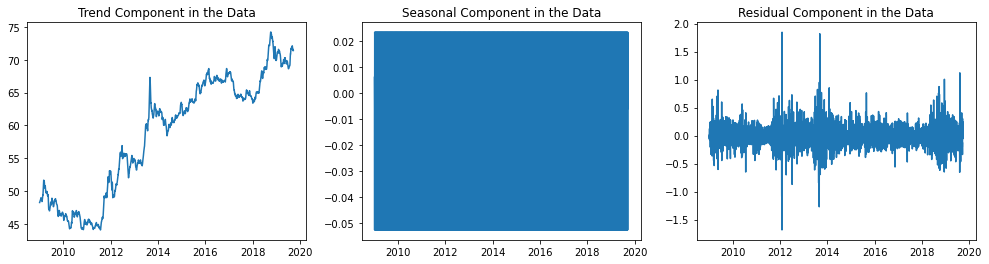

In [88]:
plt.figure(figsize=(17,4))
plt.subplot(1,3,1)
plt.title('Trend Component in the Data')
plt.plot(decomposition.trend)

plt.subplot(1,3,2)
plt.title('Seasonal Component in the Data')
plt.plot(decomposition.seasonal)

plt.subplot(1,3,3)
plt.title('Residual Component in the Data')
plt.plot(decomposition.resid)

plt.show()

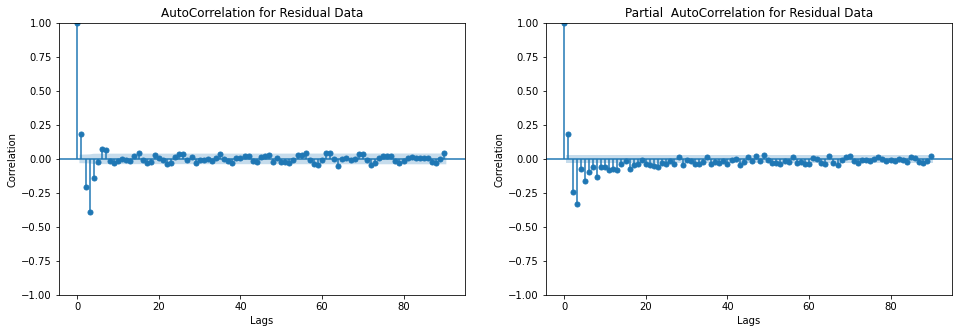

In [159]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(16,5))
acf = plot_acf(residuals,lags=90,ax=ax1)
ax1.set_title('AutoCorrelation for Residual Data')
acf = plot_pacf(residuals,lags=90,ax=ax2)
ax2.set_title('Partial  AutoCorrelation for Residual Data')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.show()

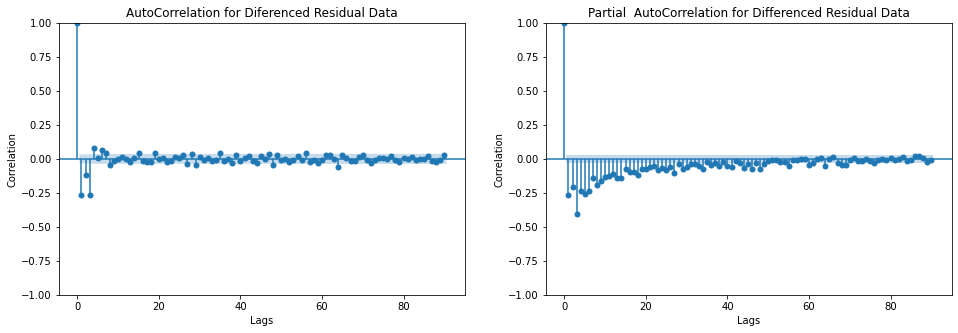

In [161]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(16,5))
acf = plot_acf(residuals.diff().dropna(),lags=90,ax=ax1)
ax1.set_title('AutoCorrelation for Diferenced Residual Data')
acf = plot_pacf(residuals.diff().dropna(),lags=90,ax=ax2)
ax2.set_title('Partial  AutoCorrelation for Differenced Residual Data')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.show()

Choosing Differencing Order

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                 3916
Model:                          ARIMA   Log Likelihood                 802.335
Date:                Thu, 22 Sep 2022   AIC                          -1600.670
Time:                        21:57:36   BIC                          -1588.125
Sample:                    01-02-2009   HQIC                         -1596.218
                         - 09-22-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.003      0.063      0.950      -0.006       0.006
sigma2         0.0389      0.000    103.135      0.000       0.038       0.040
Ljung-Box (L1) (Q):                 127.16   Jarque-

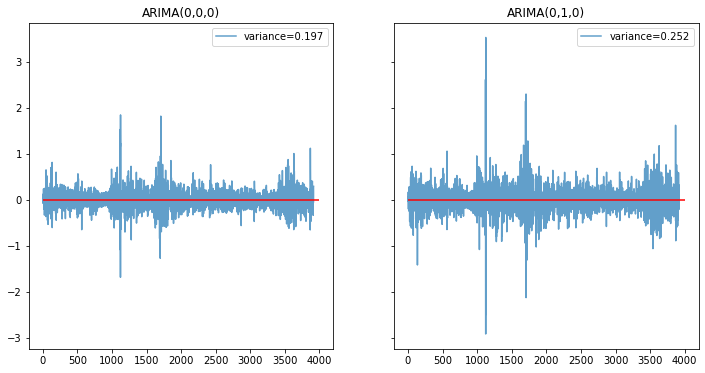

In [172]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(residuals, order=(0, 0, 0))
res_000 = model.fit()
print(res_000.summary())

model = ARIMA(residuals, order=(0, 1, 0))
res_010 = model.fit()
print(res_010.summary())

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
ax[0].plot(res_000.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_000.resid.values)))
ax[0].hlines(0, xmin=0, xmax=4000, color='r')
ax[0].set_title("ARIMA(0,0,0)")
ax[0].legend()
ax[1].plot(res_010.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_010.resid.values)))
ax[1].hlines(0, xmin=0, xmax=4000, color='r')
ax[1].set_title("ARIMA(0,1,0)")
ax[1].legend()

Choosing MA order

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                 3916
Model:                          ARIMA   Log Likelihood                 802.335
Date:                Thu, 22 Sep 2022   AIC                          -1600.670
Time:                        22:22:38   BIC                          -1588.125
Sample:                    01-02-2009   HQIC                         -1596.218
                         - 09-22-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.003      0.063      0.950      -0.006       0.006
sigma2         0.0389      0.000    103.135      0.000       0.038       0.040
Ljung-Box (L1) (Q):                 127.16   Jarque-

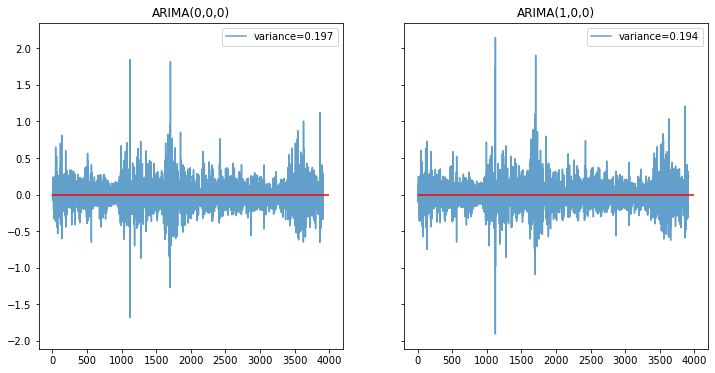

In [174]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(residuals, order=(0, 0, 0))
res_000 = model.fit()
print(res_000.summary())

model = ARIMA(residuals, order=(1, 0, 0))
res_010 = model.fit()
print(res_010.summary())

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
ax[0].plot(res_000.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_000.resid.values)))
ax[0].hlines(0, xmin=0, xmax=4000, color='r')
ax[0].set_title("ARIMA(0,0,0)")
ax[0].legend()
ax[1].plot(res_010.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_010.resid.values)))
ax[1].hlines(0, xmin=0, xmax=4000, color='r')
ax[1].set_title("ARIMA(1,0,0)")
ax[1].legend()

Choosing AR order

In [181]:
model = auto_arima(residuals, start_p=0, start_q=0,
                          max_p=3, max_q=3,
                          seasonal=False,
                          d=0,trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1602.666, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1729.874, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-1781.456, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=1.24 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-1870.671, Time=0.50 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=2.31 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=2.26 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=2.59 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1868.681, Time=1.67 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0]          
Total fit time: 11.204 seconds


Fitting ARIMA model

In [188]:
train = sm.tsa.seasonal_decompose(df_value[['INR=X_Close']][:], model='additive', extrapolate_trend='freq').resid[:3500]
test = sm.tsa.seasonal_decompose(df_value[['INR=X_Close']][:], model='additive', extrapolate_trend='freq').resid[3500:3600]

In [193]:
train

Date
2009-01-02    0.005838
2009-01-03   -0.022988
2009-01-04   -0.051835
2009-01-05   -0.058960
2009-01-06    0.109059
                ...   
2018-07-29    0.052113
2018-07-30    0.050053
2018-07-31    0.061713
2018-08-01   -0.107944
2018-08-02   -0.263935
Name: resid, Length: 3500, dtype: float64

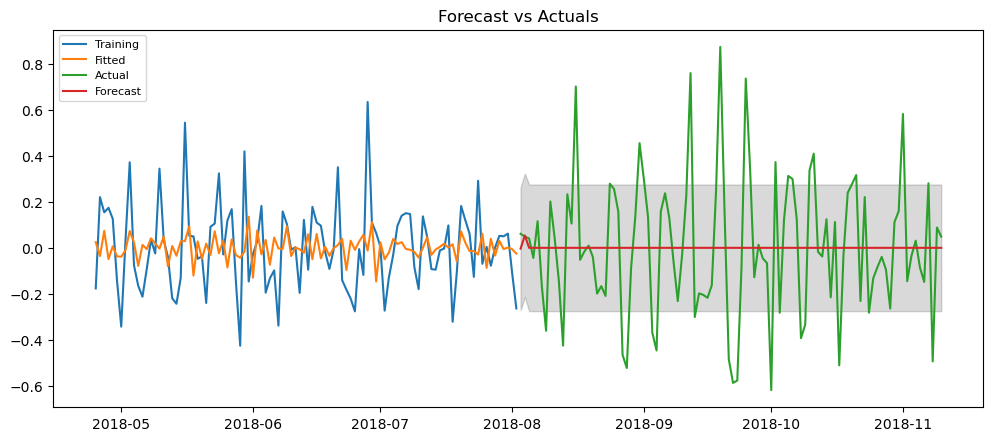

In [192]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(0, 0, 2), trend="t")   # only change is here!
model_fit = model.fit()

forecast = model_fit.get_forecast(steps=test.shape[0])
forecasts_and_intervals = forecast.summary_frame(alpha=0.15)

# Make as pandas series
fc_series = forecasts_and_intervals['mean']
lower_series = forecasts_and_intervals['mean_ci_lower']
upper_series = forecasts_and_intervals['mean_ci_upper']

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train[-100:], label='Training')
plt.plot(model_fit.predict()[-100:],label='Fitted')
plt.plot(test, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Fitting on the Normal Data

In [205]:
train = df_value[['INR=X_Close']][:3500]
test = df_value[['INR=X_Close']][3500:]

In [200]:
model = auto_arima(train, start_p=0, start_q=0,
                          max_p=3, max_q=3,
                          seasonal=False,
                          d=1,trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                           trend='t',
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=428.623, Time=0.62 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=386.350, Time=0.80 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=387.116, Time=1.64 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=428.623, Time=0.63 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=388.184, Time=0.94 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=387.987, Time=0.94 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=434.966, Time=2.34 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=386.350, Time=0.75 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 8.665 seconds


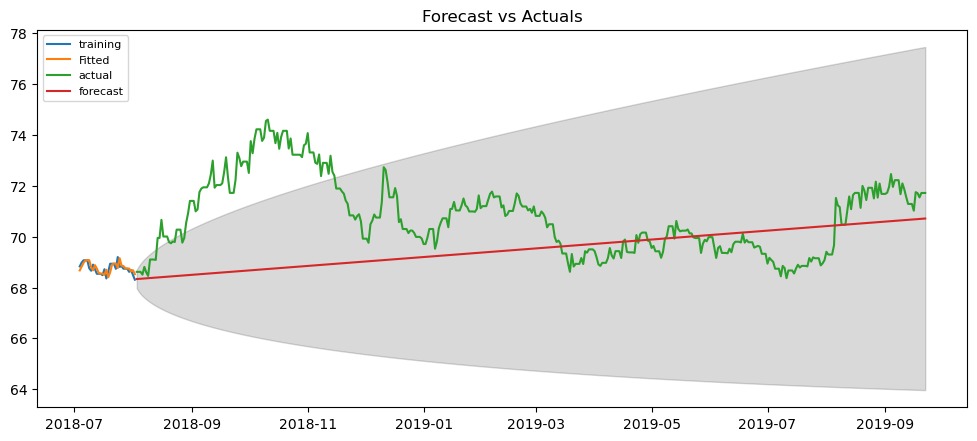

In [202]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 0), trend="t")   # only change is here!
model_fit = model.fit()

forecast = model_fit.get_forecast(steps=test.shape[0])
forecasts_and_intervals = forecast.summary_frame(alpha=0.15)

# Make as pandas series
fc_series = forecasts_and_intervals['mean']
lower_series = forecasts_and_intervals['mean_ci_lower']
upper_series = forecasts_and_intervals['mean_ci_upper']

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train[-30:], label='training')
plt.plot(model_fit.predict()[-30:],label='Fitted')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

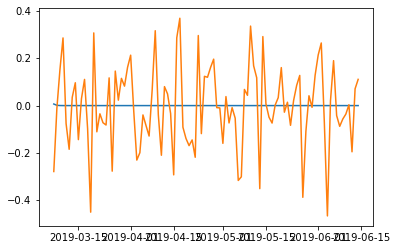

In [98]:
plt.plot(model_fit.forecast(100))
plt.plot(residuals[-200:-100])

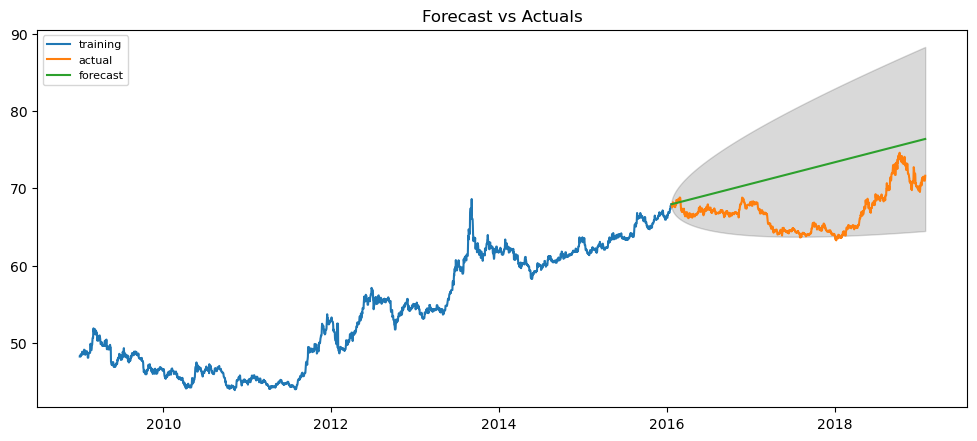

In [111]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 0), trend="t")   # only change is here!
model_fit = model.fit()

forecast = model_fit.get_forecast(steps=test.shape[0])
forecasts_and_intervals = forecast.summary_frame(alpha=0.15)

# Make as pandas series
fc_series = forecasts_and_intervals['mean']
lower_series = forecasts_and_intervals['mean_ci_lower']
upper_series = forecasts_and_intervals['mean_ci_upper']

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Seasonal ARIMA

In [9]:
import pmdarima as pm
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
df3 = df_value['INR=X_Close']

In [288]:
df3.shape

(3916,)

In [286]:
train = df_value[['INR=X_Close']][:3500]
test = df_value[['INR=X_Close']][3500:]

In [287]:
model = auto_arima(train, start_p=2, start_q=0,
                          max_p=3, max_q=3,m=7,start_P=1,start_Q=0, 
                          max_P = 3, max_Q = 3,
                          seasonal=True,
                          d=1,D=0,trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,0)(1,0,0)[7] intercept   : AIC=382.023, Time=0.93 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=428.475, Time=0.69 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=380.229, Time=0.66 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=381.097, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=428.215, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=386.168, Time=0.49 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=382.226, Time=1.01 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=382.239, Time=0.83 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=380.267, Time=0.85 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=384.225, Time=1.41 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=423.428, Time=0.57 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=381.474, Time=2.50 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=381.061, Time=0.66 sec
 ARIMA(2,1,1)(1,0,0)[7] intercept   : AIC=379.509, Time=3.33 sec
 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=390.0

In [289]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
final_model = SARIMAX(train,order=(2,1,2),seasonal_order=(1,0,0,7))
result = final_model.fit()
print(result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        INR=X_Close   No. Observations:                 3500
Model:             SARIMAX(2, 1, 2)x(1, 0, [], 7)   Log Likelihood                -183.037
Date:                            Sun, 25 Sep 2022   AIC                            378.074
Time:                                    20:40:31   BIC                            415.036
Sample:                                01-02-2009   HQIC                           391.266
                                     - 08-02-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2717      0.184     -1.480      0.139      -0.631       0.088
ar.L2          0.3366      0.075   

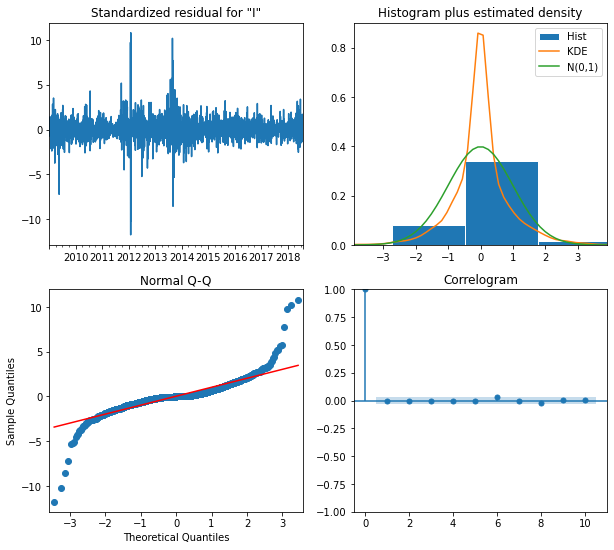

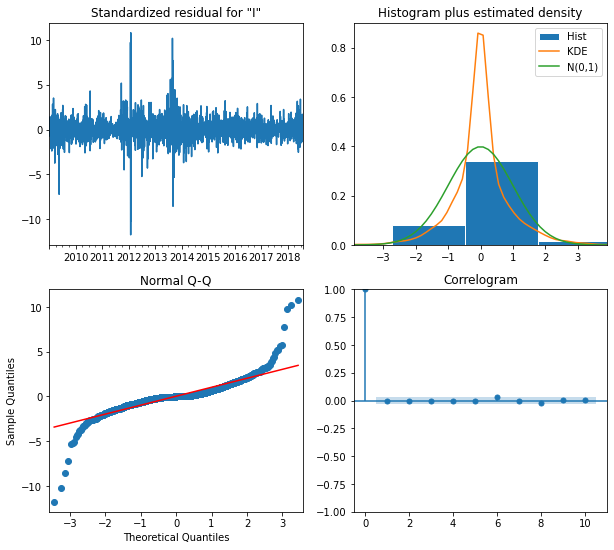

In [290]:
result.plot_diagnostics(figsize=(10, 9))

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Production')]

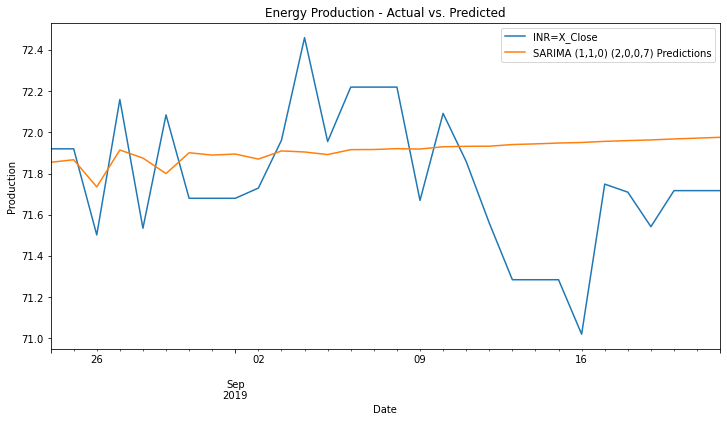

In [307]:
train = df3[-500:-30]
test = df3[-30:]
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Best final_model = SARIMAX(train,order=(3,1,3),seasonal_order=(3,0,0,7))
final_model = SARIMAX(train,order=(2,1,2),seasonal_order=(1,0,0,7),trend='t')
result = final_model.fit()

# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = result.predict(start=start, end=end, dynamic=True, typ='levels').rename('SARIMA (1,1,0) (2,0,0,7) Predictions')
# Plot predictions against known values
title = 'Energy Production - Actual vs. Predicted'
ylabel='Production'
xlabel='Date'

ax = test.plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

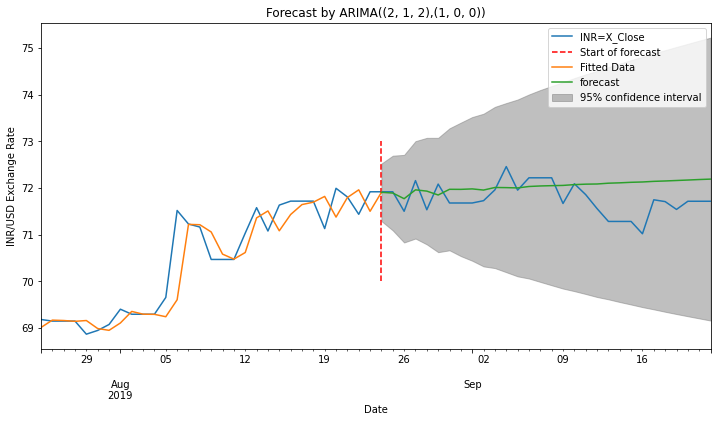

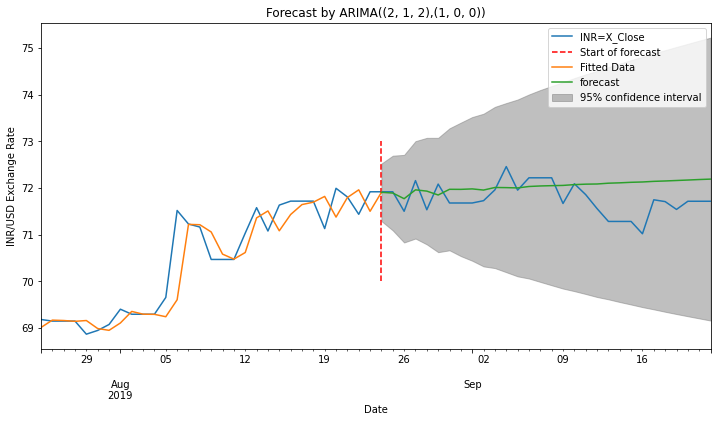

In [345]:
train = df3[-50:-30]
test = df3[-30:-15]

train = df3[-500:-30]
test = df3[-30:]


model = ARIMA(train[-500:],order=(2,1,2),seasonal_order=(1,0,0,7),trend='t')
res_111 = model.fit()

fig, ax = plt.subplots(figsize=(12, 6))
pd.concat([train[-30:],test]).plot(ax=ax);
ax.vlines(test.index[0].strftime('%Y-%m-%d'), 70, 73, linestyle='--', color='r', label='Start of forecast');
ax.plot(res_111.predict(start=len(train)-30,end=len(train),dynamic=False),label = 'Fitted Data')
# - NOTE from the official documentation :
# -- The dynamic keyword affects in-sample prediction. 
# -- If dynamic is False, then the in-sample lagged values are used for prediction. 
# -- If dynamic is True, then in-sample forecasts are used in place of lagged dependent variables.
from statsmodels.graphics.tsaplots import plot_predict

ax.title.set_text('Forecast by ARIMA((2, 1, 2),(1, 0, 0))')
ax.set_ylabel('INR/USD Exchange Rate')

plot_predict(res_111,test.index[0].strftime('%Y-%m-%d'), test.index[-1].strftime('%Y-%m-%d'), dynamic=False, plot_insample=False, ax=ax)

In [312]:
train.index[-1]

Timestamp('2018-08-02 00:00:00')

In [314]:
test.index[0]

Timestamp('2018-08-03 00:00:00')

In [338]:
res_111.predict(start=len(train)-30,end=len(train),dynamic=True)

2019-07-25    69.012580
2019-07-26    69.027612
2019-07-27    69.042549
2019-07-28    69.043857
2019-07-29    69.053192
2019-07-30    69.129057
2019-07-31    69.110710
2019-08-01    69.111881
2019-08-02    69.127482
2019-08-03    69.134301
2019-08-04    69.146223
2019-08-05    69.152355
2019-08-06    69.180417
2019-08-07    69.180852
2019-08-08    69.191759
2019-08-09    69.200207
2019-08-10    69.211982
2019-08-11    69.219976
2019-08-12    69.231255
2019-08-13    69.243175
2019-08-14    69.252884
2019-08-15    69.261245
2019-08-16    69.272489
2019-08-17    69.281282
2019-08-18    69.292203
2019-08-19    69.301092
2019-08-20    69.312698
2019-08-21    69.321415
2019-08-22    69.332059
2019-08-23    69.341273
2019-08-24    69.351870
Freq: D, Name: predicted_mean, dtype: float64

# Performance Analysis

In [5]:
import warnings
warnings.filterwarnings("ignore")
df3 = df_value['INR=X_Close']

In [6]:
df3.shape

(3916,)

In [10]:
truth = []
preds = []

for pos in range(3000,3916-10,1):
    train = df3[(pos-1000):(pos)]
    test = df3[(pos):(pos+10)]
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    final_model = SARIMAX(train,order=(2,1,2),seasonal_order=(1,0,0,7))
    result = final_model.fit()

    # Obtain predicted values
    start=len(train)
    end=len(train)+len(test)-1
    predictions = result.predict(start=start, end=end, dynamic=True, typ='levels').rename('SARIMA(2,1,2)(1,0,0,12) Predictions')
    truth.append(test.values)
    preds.append(predictions.values)

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

df_out_mape = pd.DataFrame()

Truth = np.array(truth)
Predictions = np.array(preds)

rmse = []
mape = []
for i in range(10):
    #Print MSE to see how good the model is
    Error = mean_squared_error(Truth[:,i], Predictions[:,i])
    rmse.append(Error**0.5)

    MAPE = mean_absolute_percentage_error(Truth[:,i], Predictions[:,i])
    mape.append(MAPE)

df_out_mape['MAPE'] = mape
df_out_mape['RMSE'] = rmse

In [12]:
df_out_mape

,MAPE,RMSE
0,0.002403,0.259508
1,0.003365,0.336962
2,0.004168,0.399578
3,0.004714,0.443592
4,0.005225,0.482086
5,0.005706,0.517814
6,0.006161,0.558048
7,0.006588,0.609645
8,0.006995,0.649657
9,0.007398,0.686529


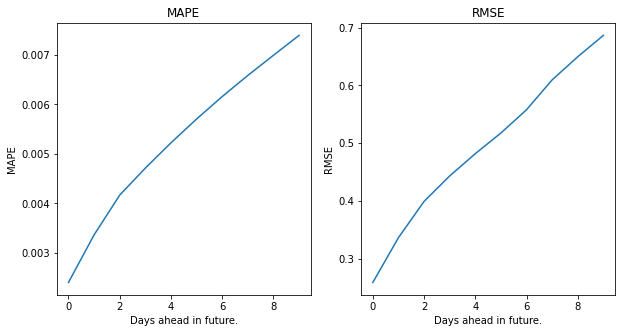

In [41]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('MAPE')
plt.plot(df_out_mape['MAPE'])
plt.xlabel('Days ahead in future.')
plt.ylabel('MAPE')
plt.subplot(1,2,2)
plt.title('RMSE')
plt.plot(df_out_mape['RMSE'])
plt.xlabel('Days ahead in future.')
plt.ylabel('RMSE')
plt.show()

# Error Analysis

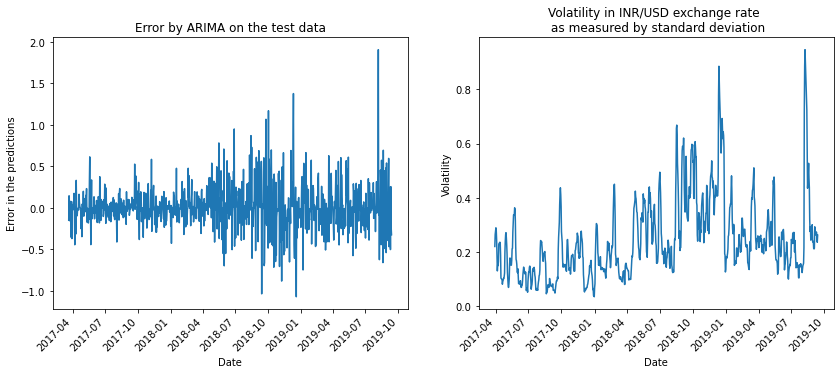

In [54]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(df3[3000:].index[:len(Truth[:,0])],Truth[:,0]- Predictions[:,0])
plt.xlabel('Date')
plt.ylabel('Error in the predictions')
plt.title('Error by ARIMA on the test data')
plt.xticks(rotation=45, ha='right')

# Rolling Volatility 
plt.subplot(1,2,2)
import pandas as pd 
price_list=pd.Series(Truth[:,0]) 
var=10 
rollist=price_list.rolling(var) 
rolvol=rollist.std(ddof=0) 
plt.plot(df3[3000:].index[:len(Truth[:,0])],rolvol) 
plt.title('Volatility in INR/USD exchange rate \n as measured by standard deviation') 
plt.xticks(rotation=45, ha='right')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show() 